# Lending Club Case Study: Defaulter Loan Analysis

### Assignment Brief:¶

##### Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company 
 
The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
 
In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


##### When a person applies for a loan, there are two types of decisions that could be taken by the company:
1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
    * Fully paid: Applicant has fully paid the loan (the principal and the interest rate) 
    * Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    * Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 
### Business Objectives

##### This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
 
#####  Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
 
###### If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
 
##### In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

#### The analysis is divided into four main parts:
1. Data understanding 
2. Data cleaning (cleaning missing values, removing redundant columns etc.)
3. Data Analysis (Univariate, Bivariate and Segmented)
4. Inferences and Recommendations

##### Submission By: Chhaya Singh Parihar (group facilitator) and Venki Ramachandran

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

sns.set(style='whitegrid')

#as data set is very big to display and normally notebook will not display all columns without set_option in pandas
pd.set_option('display.max_rows', 120, 'display.max_columns', 120)
pd.options.display.float_format = '{:,.2f}'.format



In [3]:
#Read Loan dataset from file, ecoding used ISO-8859-1
#because it was giving error on memory so i used low_memory options as false

loan = pd.read_csv("loan.csv", encoding = "ISO-8859-1", low_memory=False)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# Let us look at the dat we have
loan.shape

(39717, 111)

Although the Data Dictionary listed 115 columns, we only see 111 as per the above. Let us go with what is in the actual data file and not worry about the DataDictionary.xlsx file, in reality people may make a mistake, Just focus on the actuals data you have.

## Data Review and Analysis

In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","14,035.00","2,786.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,661.00",0.00,"39,717.00",0.00,0.00,0.00,"39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,661.00","39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,020.00","39,678.00",0.00,0.00,0.00,0.00
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,35.90,69.70,9.29,0.06,"13,382.53",22.09,51.23,50.99,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,22.02,43.82,4.40,0.24,"15,885.02",11.40,375.17,373.82,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.00,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,18.00,22.00,6.00,0.00,"3,703.00",13.00,0.00,0.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,34.00,90.00,9.00,0.00,"8,850.00",20.00,0.00,0.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,

A lot of NaN's, we should clean this.

In [6]:
# let's look at the first few rows`
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan

In [7]:
# Looking at all the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

One of the Predictor = length_of_loan. Let us say this affects the load default the most and our data is showing the pattern. The objective is to find patterns based on hstorical data and based on that give insights to the loan department.
Some of the other columns in the dataset are 'loan_amnt', 'funded_amnt', 'funded_amnt_inv' (assume same unless different), term, interest rate, grade, sub grade, annual income, purpose of the loan etc.

The **target variable**, which is loan status, must be analyzed for affect among all independent variable. Find the one that affects it the most



# Data Cleaning

### Delete columns with all nulls.

In [8]:
# Missing values per column expressed as % of total number of values
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


You can see that many columns have 100% missing values, some have 65%, 33% etc. First, let's get rid of the columns having 100% missing values. Lets remove all the columns with more than 50% missing values.

In [9]:
# removing the columns having more than 50% missing values
missing_columns = list(missing[missing >= 50].index)
len(missing_columns)

57

In [10]:
#we got 57 columns with more than 50% values as missing. 
#Lets remove these columns as these columns adding noise and wont help in analysis.
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 54)


#### we are now reduced the number of columns to be 54, let us look at them further

In [11]:
#list the missing values columns again
missing = 100*(loan.isnull().sum()/len(loan.index))
#no need to display missing %age having 0
missing[missing != 0]

emp_title                     6.19
emp_length                    2.71
desc                         32.58
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [12]:
# There is column with approx 32.58% missing values - 
# desc

As per the data dictionary,'desc' contains the comments the applicant had written while applying for the loan. Not applicable to influence if a loan should be granted or not. IGNORE. 

it concludes that we can safely drop this column.

In [13]:
# dropping the desc column
loan = loan.drop(['desc'], axis=1)

In [14]:
#list the missing values columns again
missing = 100*(loan.isnull().sum()/len(loan.index))
#no need to display missing %age having 0
missing[missing != 0]

emp_title                    6.19
emp_length                   2.71
title                        0.03
revol_util                   0.13
last_pymnt_d                 0.18
last_credit_pull_d           0.01
collections_12_mths_ex_med   0.14
chargeoff_within_12_mths     0.14
pub_rec_bankruptcies         1.75
tax_liens                    0.10
dtype: float64

In [15]:
loan.shape

(39717, 53)

There are some more columns with **low** missing values, we can ignore them because Ms. Reena said we do not have to impute any values. We now have 53 columns in the df

## Check rows with large missing values

In [16]:
#Lets first check from above list of columns having missing values and check for count on unique values
print("unique emp_title : %d"  % len(loan.emp_title.unique()))
print("unique emp_length : %d"  % len(loan.emp_length.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique revol_util : %d"  % len(loan.revol_util.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique title : 19616
unique revol_util : 1090
unique title : 19616
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


### emp_length, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies and tax_liens are clearly Categorical with values belonging to a range.
## Let's take a look at all the different values of these Categorical columns

In [17]:
#unique values in emp_length column
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [18]:
#unique values in collections_12_mths_ex_med column
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [19]:
#unique values in chargeoff_within_12_mths column
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [20]:
#unique values in pub_rec_bankruptcies column
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [21]:
#unique values in tax_liens column
loan.tax_liens.unique()

array([ 0., nan])

#### we can see from above columns collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens has either value of # 0 or nan(no entry/blank). The range of values that these categorical columns can take is not of any significant impact to the analysis. 
#### We can decide to drop these columns for analysis.

In [22]:
columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(columnlist,axis=1)

In [23]:
loan.shape

(39717, 50)

In [24]:
#now pub_rec_bankruptcies categorical column with 1.76% missing data. 
#It tells us about the past number of public record bankruptcies of that borrower.
loan.pub_rec_bankruptcies.value_counts()

0.00    37339
1.00     1674
2.00        7
Name: pub_rec_bankruptcies, dtype: int64

#### It can be seen to have taking values like [0,1,2]. Almost 37400 records with 0 record of bankrupcies, 1674 records having one bankrupcies case and 7 records with two bankrupcies case. 
#### we could have taken the statistical mode representation of the data which is 0 bankrupcies to impute the missing values. But, we decide to remove the rows instead so that we ensure we dont add any bais to the data.

In [25]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [26]:
#now again list the missing values columns
missing = 100*(loan.isnull().sum()/len(loan.index))
#no need to display missing %age having 0
missing[missing != 0]

emp_title            6.19
emp_length           2.75
title                0.03
revol_util           0.13
last_pymnt_d         0.18
last_credit_pull_d   0.00
dtype: float64

##### again from the above, the columns emp_title, emp_length have 6.19% and 2.75% missing value. These columns have information about the customer/borrower like their job title and their employment length in years. Let's remove the rows with nan/blank values for these varaibles.

In [27]:
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [28]:
loan.shape

(36548, 50)

##### 3 columns title, revol_util and last_pymnt_d which account for a very small % of missing value of 0.02%, 0.13% and 0.18% respectively. 
* title gives the title of the loan specified by the borrower in the application. 
* revol_util gives the revolving line utelization and 
* last_pymnt_d gives the month in which last payment was received.
#### So Let's again remove the rows with null value for these variables.

In [29]:
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

In [30]:
loan.shape

(36433, 50)

In [31]:
#list the missing values columns
missing = 100*(loan.isnull().sum()/len(loan.index))
#no need to display missing %age having 0
missing[missing != 0]

Series([], dtype: float64)

#### now we have reduced the data set to have 36433 loan records and 50 attributes with no missing values. Let's write it into another file and use that file for further analysis.

In [32]:
loan.to_csv('clean_loan.csv', encoding='utf-8', index=False)

## Further shortlist and narrow down the columns for analysis
#### Let's now analyse all the columns in the resulted dataframe and find only the ones with are required or make sense for the analysis.

## Check if all column have correct data type with names

In [33]:
#make copy of clean dataframe to put further analysis on it
loan1 = loan[:]

In [34]:
#Count distinct observations over dataframe
loan1.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

#### A data dictionary file is also been provided along with the loan data. This file gives a brief describtion about all the columns of the loan transaction file. 
* We can use this file to get a better understanding of the 50 columns we are left with.This will help to further narrow down on the columns.

#### There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

##### These columns are: i have checked details with loan1.column_name.unique() 
* id : A unique LC assigned ID for the loan listing, does not contribute to analysis
* member_id : A unique LC assigned Id for the borrower member, does not contribute to analysis
* pymnt_plan : Indicates if a payment plan has been put in place for the loan, we checked value for entire dataset is 'n', therefore can be removed.
* url : URL for the LC page with listing data corresponding to each memberid, nothing to do with loan default.
* initial_list_status : The initial listing status of the loan. Possible values are – W, F. value for entire dataset is 'f' out of the possible values, therefore can be removed.
* policy_code : value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
* application_type : value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
* acc_now_delinq : value for entire dataset is '0', therefore can be removed.
* delinq_amnt : value for entire dataset is '0', therefore can be removed.

##### Also this wont be available at the time of decision making of funding a loan.

In [35]:
#hence dropping the above columns from the loan1 dataframe.
columns_list = ['id','member_id','pymnt_plan','url','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
loan1= loan1.drop(columns_list,axis=1)

In [36]:
loan.shape

(36433, 50)

In [37]:
loan1.shape

(36433, 41)

In [38]:
#lets look at the values in derived dataset 
loan1.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
3,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00
5,5000,5000,"5,000.00",36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,"36,000.00",Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.00
6,7000,7000,"7,000.00",60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,"47,004.00",Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,"10,110.84","10,110.84","6,985.61","3,125.23",0.00,0.00,0.00,May-16,"1,313.76",May-16,0.00
7,3000,3000,"3,000.00",36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,"48,000.00",Source Verified,Dec-11,Fully Paid,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.00,0.00,"3,939.14","3,939.14","3,000.00",939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.00
9,5375,5375,"5,350.00",60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,"15,000.00",Verified,Dec-11,Charged Off,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.00,0.00,"1,476.19","1,469.34",673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,0.00
10,6500,6500,"6,500.00",60 months,14.65%,153.45,C,C3,Southwest Rural metro,5 years,OWN,"72,000.00",Not Verified,Dec-11,Fully Paid,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,0,Jan-98,2,14,0,4032,20.60%,23,0.00,0.00,"7,678.02","7,678.02","6,500.00","1,178.02",0.00,0.00,0.00,Jun-13,"1,655.54",Dec-15,0.00
11,12000,12000,"12,000.00",36 months,12.69%,402.54,B,B5,UCLA,10+ years,OWN,"75,000.00",Source Verified,Dec-11,Fully Paid,debt_consolidation,Consolidation,913xx,CA,10.78,0,Oct-89,0,12,0,23336,67.10%,34,0.00,0.00,"13,947.99","13,947.99","12,000.00","1,947.99",0.00,0.00,0.00,Sep-13,"6,315.30",Aug-13,0.00
12,9000,9000,"9,000.00",36 months,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,debt_consolidation,freedom,245xx,VA,10.08,0,Apr-04,1,4,0,10452,91.70%,9,0.00,0.00,"2,270.70","2,270.70","1,256.14",570.26,0.00,444.30,4.16,Jul-12,305.38,Nov-12,0.00


##### Now Columns for analysis reduced to 41 columns.

#### Next, there are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. Doing so will help in further using these column values to its best for analysis.
#### These columns are:
* issue_d
* earliest_cr_line
* last_pymnt_d
* last_credit_pull_d

In [39]:
date_columns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan1[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [40]:
#change type to datetime from object
loan1.issue_d = pd.to_datetime(loan1.issue_d, format='%b-%y')
loan1.earliest_cr_line = pd.to_datetime(loan1.earliest_cr_line, format='%b-%y')
loan1.last_pymnt_d = pd.to_datetime(loan1.last_pymnt_d, format='%b-%y')
loan1.last_credit_pull_d = pd.to_datetime(loan1.last_credit_pull_d, format='%b-%y')

In [41]:
loan1[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


In [42]:
loan1.shape

(36433, 41)

In [43]:
# Column term (has months after space), int_rate and revol_util (has%), 
# and emp_length (has + and years)
# are objetcs, they be numbers
# column int_rate,revol_util, convert it
loan1['int_rate'] = loan1['int_rate'].str.strip('%').astype('float')
loan1['revol_util'] = loan1['revol_util'].str.strip('%').astype('float')

In [44]:
loan1[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36433 non-null  float64
 1   revol_util  36433 non-null  float64
dtypes: float64(2)
memory usage: 853.9 KB


In [45]:
loan1.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [46]:
# 36month, 60month - split at mon
loan1['term'] = loan1.term.apply(lambda x: x.split()[0])

In [47]:
loan1.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

In [48]:
loan1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,"2,500.00",60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00
3,10000,10000,"10,000.00",36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00
4,3000,3000,"3,000.00",60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,2011-12-01,Current,other,Personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.90,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.00
5,5000,5000,"5,000.00",36,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,"36,000.00",Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.00
6,7000,7000,"7,000.00",60,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,"47,004.00",Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,2005-07-01,1,7,0,17726,85.60,11,0.00,0.00,"10,110.84","10,110.84","6,985.61","3,125.23",0.00,0.00,0.00,2016-05-01,"1,313.76",2016-05-01,0.00


In [49]:
# term and int_rate look good, emp_length is a mess

In [50]:
loan1.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

##### According to the data_dictionary file description for this field,
* emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
##### Let's convert the column to have values between 0 and 10.

In [51]:
# Extract the numeric part from the variable employment length

# first, let's update missing values to zero, will not affect binning
loan1['emp_length'] = loan1['emp_length'].apply(lambda x: 0 if(x =="") else x)
loan1['emp_length'] = loan1['emp_length'].apply(lambda x: 0 if(x =="nan") else x)
loan1['emp_length'] = loan1['emp_length'].apply(lambda x: 1 if(x =="< 1 year") else x)
loan1['emp_length'] = loan1['emp_length'].apply(lambda x: 11 if(x =="10+ years") else x)
loan1['emp_length'] = loan1['emp_length'].apply(lambda x: str(x).split(" ")[0])

In [52]:
loan1.emp_length.unique()

array(['1', '11', '3', '8', '9', '5', '4', '6', '2', '7'], dtype=object)

In [53]:
loan1.emp_length.value_counts()

11    8407
1     7078
2     4178
3     3914
4     3297
5     3129
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [54]:
# Convert it to numeric
loan1['emp_length'] = loan1['emp_length'].apply(lambda x: pd.to_numeric(x))

In [55]:
# looking at type of the columns again
loan1.shape

(36433, 41)

In [56]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36433 non-null  int64         
 1   funded_amnt              36433 non-null  int64         
 2   funded_amnt_inv          36433 non-null  float64       
 3   term                     36433 non-null  object        
 4   int_rate                 36433 non-null  float64       
 5   installment              36433 non-null  float64       
 6   grade                    36433 non-null  object        
 7   sub_grade                36433 non-null  object        
 8   emp_title                36433 non-null  object        
 9   emp_length               36433 non-null  int64         
 10  home_ownership           36433 non-null  object        
 11  annual_inc               36433 non-null  float64       
 12  verification_status      36433 n

All desired columns are int and numeric, proceed to next step

##### * earliest_cr_line: The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_year
#### Lets split the available date into month and year column.

In [57]:
loan1['earliest_cr_line_month'] = loan1['earliest_cr_line'].dt.month
loan1['earliest_cr_line_year'] = loan1['earliest_cr_line'].dt.year

In [58]:
#issue_d: The month which the loan was funded .Lets split the available date into month and year column.
loan1['issue_d_month'] = loan1['issue_d'].dt.month
loan1['issue_d_year'] = loan1['issue_d'].dt.year

In [59]:
# Creating a profit and loss column 
#derived column for analysis
loan1['PnL']=(
    loan1['total_pymnt']-loan1['funded_amnt']
)*100/loan1['funded_amnt']

In [60]:
#derived column for analysis
loan1['annual_inc_thousands'] = loan1['annual_inc'] / 1000

In [61]:
loan1['annual_inc_thousands'].describe()

count   36,433.00
mean        69.31
std         63.54
min          4.00
25%         42.00
50%         60.00
75%         83.00
max      6,000.00
Name: annual_inc_thousands, dtype: float64

In [62]:
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
loan1[columns] = loan1[columns].apply(lambda x: x.astype('category'))

### Writing the ready to analyse data to a master_loan csv. We will use this new csv for ease in further analysis.

In [63]:
loan1.to_csv('final_loan.csv', encoding='utf-8', index=False)

# Data Analysis

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. 
As per the classroom session, there are three types of variables
* 1. those which are related to the applicant (variables such as age, occupation, employment details etc.), 
* 2. loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 
* 3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent, next payment date etc.).

Since the customer behaviour variables are not available at the time of loan application, we will discard them. Only two types of variables are necessary.

In [64]:
df = pd.read_csv('final_loan.csv', encoding='utf-8')

In [65]:
not_applicable_vars =  [
  "title", # useless columns not reqd for loan determination
  "zip_code", 
  "addr_state",
    "emp_title",
  "pub_rec", # post loan vars not reqd for loan determination
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc", # end of post loan vars, start of other customer vars
  "collection_recovery_fee",
  "delinq_2yrs"]
not_applicable_vars

['title',
 'zip_code',
 'addr_state',
 'emp_title',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'collection_recovery_fee',
 'delinq_2yrs']

In [66]:
# let's now remove the behaviour variables from analysis
df = df.drop(not_applicable_vars, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               36433 non-null  int64  
 1   funded_amnt             36433 non-null  int64  
 2   funded_amnt_inv         36433 non-null  float64
 3   term                    36433 non-null  int64  
 4   int_rate                36433 non-null  float64
 5   installment             36433 non-null  float64
 6   grade                   36433 non-null  object 
 7   sub_grade               36433 non-null  object 
 8   emp_length              36433 non-null  int64  
 9   home_ownership          36433 non-null  object 
 10  annual_inc              36433 non-null  float64
 11  verification_status     36433 non-null  object 
 12  issue_d                 36433 non-null  object 
 13  loan_status             36433 non-null  object 
 14  purpose                 36433 non-null

In [67]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,PnL,annual_inc_thousands
0,2500,2500,"2,500.00",60,15.27,59.83,C,C4,1,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,1.00,"1,008.71","1,008.71",0.00,4,1999,12,2011,-59.65,30.00
1,10000,10000,"10,000.00",36,13.49,339.31,C,C1,11,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,20.00,"12,231.89","12,231.89",0.00,2,1996,12,2011,22.32,49.20
2,3000,3000,"3,000.00",60,12.69,67.79,B,B5,1,RENT,"80,000.00",Source Verified,2011-12-01,Current,other,17.94,"3,513.33","3,513.33",0.00,1,1996,12,2011,17.11,80.00
3,5000,5000,"5,000.00",36,7.90,156.46,A,A4,3,RENT,"36,000.00",Source Verified,2011-12-01,Fully Paid,wedding,11.20,"5,632.21","5,632.21",0.00,11,2004,12,2011,12.64,36.00
4,7000,7000,"7,000.00",60,15.96,170.08,C,C5,8,RENT,"47,004.00",Not Verified,2011-12-01,Fully Paid,debt_consolidation,23.51,"10,110.84","10,110.84",0.00,7,2005,12,2011,44.44,47.00


In [68]:
df.shape

(36433, 25)

##### We are now left with 25 columns and 36433 rows and the data looks clean

Next, let us convert the **target variable** loan_status to a binary numeric so that it is easy to plot and stuff.

In [69]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

Actually we need to understand differences in the features between loans that have been fully paid or charged off. Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."

In [70]:
# filtering only fully paid or charged-off
df = df[~df['loan_status'].isin(['Current'])]
df = df[df['loan_status'].isin(['Fully Paid','Charged Off'])]
df['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Current            0
Name: loan_status, dtype: int64

In [71]:
df.shape

(35367, 25)

# Univariate and Segmented Univariate Analysis
#### Define a few methods to aid in plotting graphs with more readable and analysable formats

In [72]:
# Generic histplot function
def generic_histplot(y_var):
        sns.histplot(data=df, y=y_var)
        plt.show()

In [73]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [74]:
## Wonderful solution to show labels in bar plots - 
## copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [75]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# can see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 9))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [76]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    values = (df.loc[df['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 9))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

In [77]:
(df['grade'].value_counts(normalize=True)*100).sort_index()

A   25.84
B   30.31
C   20.30
D   13.18
E    7.02
F    2.55
G    0.80
Name: grade, dtype: float64

## Univariate Analysis

Let us check and see how many did not pay, i.e. defaulted on their loan 5399/(32145+5399) = 14%

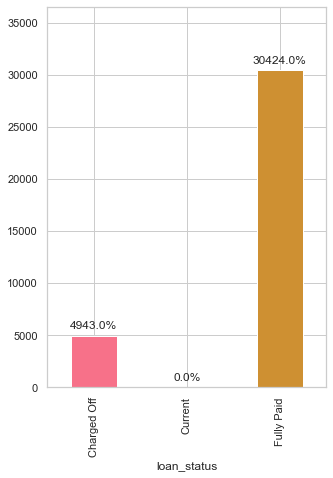

In [78]:
plt.figure(figsize=(5,7))
ax = df.groupby('loan_status').loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
showLabels(ax)
plt.show()

In [79]:
print("%.2f" % (df.loc[df['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(df)))

13.98


#### Inference:
* Most of the loans are Fully Paid.
* About 14% of loan are having status as defaulters.
* We have a class imbalance here.

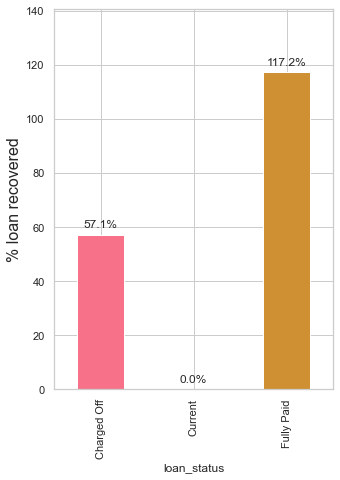

In [80]:
plt.figure(figsize=(5,7))
ax = (df.groupby('loan_status').total_pymnt.sum() * 100 / df.groupby('loan_status').loan_amnt.sum()).plot.bar(color=sns.color_palette('husl', 16))
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

### Let us see graphs of some other important variables
* Variable: loan_amnt
* Data_Dictionary: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


/Users/chhaya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


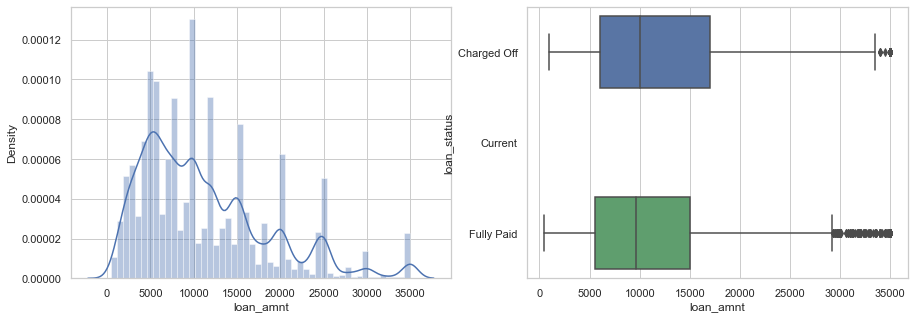

In [81]:
plot_distribution(df, 'loan_amnt')

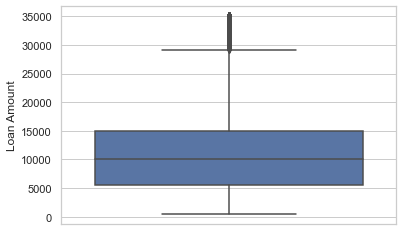

In [82]:
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

#### Inference: The loan amount varies from 0 to 35,000 having mean of 10,000

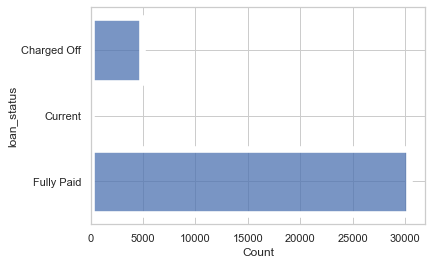

In [83]:
generic_histplot('loan_status')

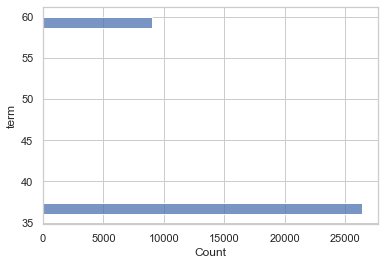

In [84]:
generic_histplot('term')

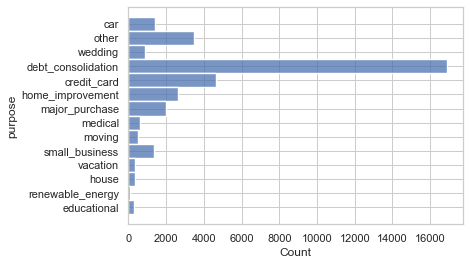

In [85]:
generic_histplot('purpose')

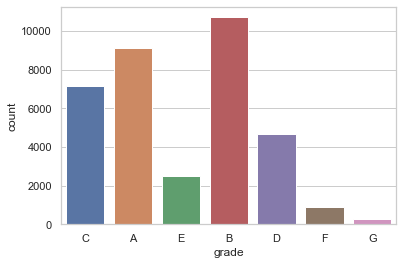

In [86]:
sns.countplot(x='grade', data=df)
plt.show()

#### Inference: 

* Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

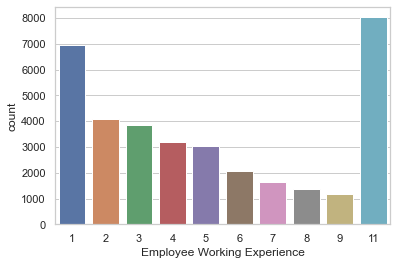

In [87]:
sns.countplot(x='emp_length', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

#### Inference: 
* Majority of employees applying for the loan have more than 10 years of experience

/Users/chhaya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


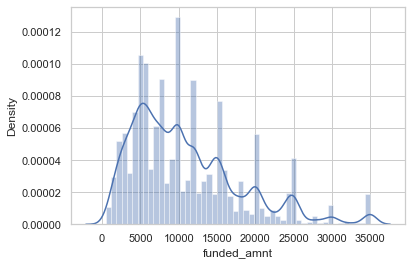

In [88]:
sns.distplot(df['funded_amnt'])
plt.show()

#### Inference: 
* Funded amount is left skewed. Most of the loan amount is between 5000 and 15000

In [89]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"4,943.00","12,286.15","8,064.26","1,000.00","6,000.00","10,000.00","17,000.00","35,000.00"
Current,0.00,nan,nan,nan,nan,nan,nan,nan
Fully Paid,"30,424.00","10,945.73","7,181.87",500.00,"5,500.00","9,600.00","15,000.00","35,000.00"


#### Observation:
* Overall, the applied loan amount distribution mean is greater than the median. Most of the loans granted are below 15000 (75 percentile value)
* Funding amounts see a spike around each 5000 boundary.
* Charged off loans are shifted towards higher average loan amount request.

In [90]:
#Create Derived categorical variable
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

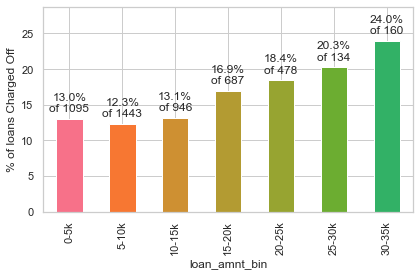

In [91]:
# below plots a given column buckets against loan_status (default = 'Charged Off')
# its in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value.

grp = df.groupby(['loan_status','loan_amnt_bin'])['loan_amnt_bin'].count()
cnt = df.groupby('loan_amnt_bin')['loan_amnt_bin'].count()
#print(grp)
percentages = grp.unstack() * 100 / cnt.T
#print(percentages)
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
ax.set_ylabel('% of loans ' + 'Charged Off')
showLabels(ax, grp['Charged Off'].to_dict())
plt.margins(0.2, 0.2)
plt.tight_layout()

#### Observation:
* The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default.

## Segmented Univariate Analysis

In [92]:
# Generic func to plot loan_status across categorical variables
def generic_barplot(x_var):
    sns.barplot(x=x_var, y='loan_status', data=df)
    plt.show()
    

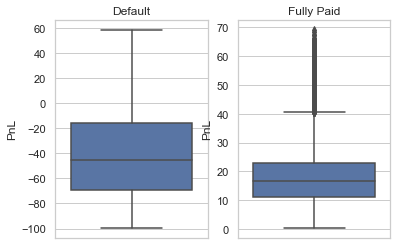

In [93]:
#Relationship of Funded Amount with defaults
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=df[df.loan_status=='Charged Off'].PnL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=df[df.loan_status=='Fully Paid'].PnL)
plt.show()

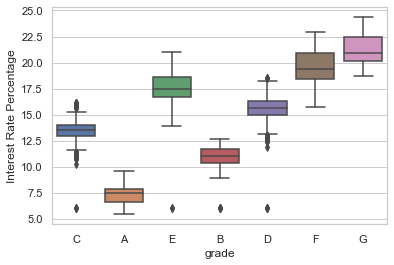

In [94]:
sns.boxplot(y='int_rate', x='grade', data=df)
plt.ylabel('Interest Rate Percentage')
plt.show()

#### Grade 
Defaulters increase as the grade of the loan moves A to G, with G having more defaulters

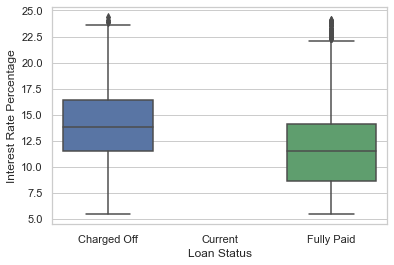

In [95]:
sns.boxplot(y='int_rate', x='loan_status', data=df)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

#### As interest rate goes up the default number also goes up as seen by a higher mean

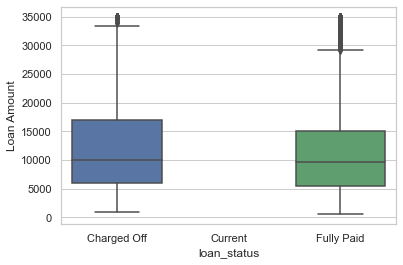

In [96]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=df)
plt.ylabel('Loan Amount')
plt.show()

#### Inference: 
* Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

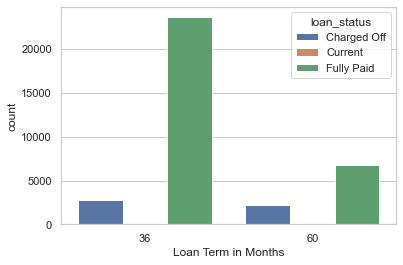

In [97]:
sns.countplot( x="term", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

#### Inference: 
* 36 term loans have a sighty more chances of default as seen above

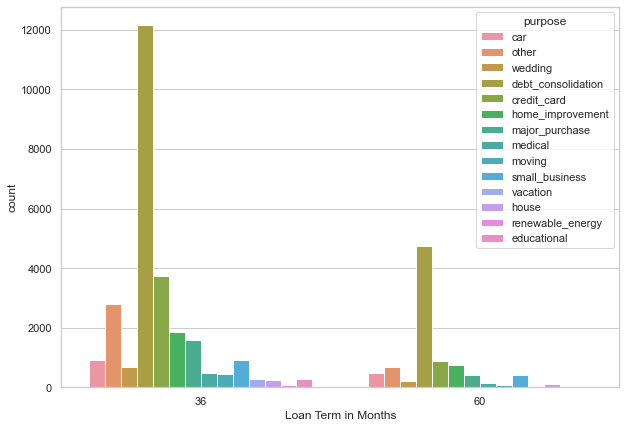

In [98]:
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

#### Inference: 
* Tenure of 36 months have high chances to be defaulters

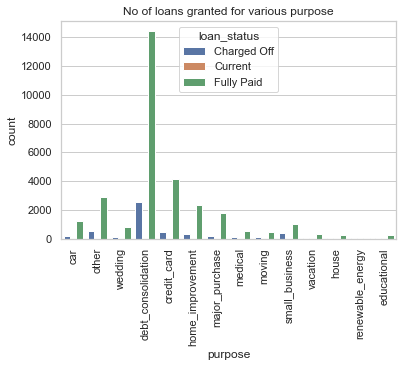

In [99]:
sns.countplot(x='purpose', hue='loan_status', data=df)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

#### Inference
debt_consilidation has the most number of loans, fully paid as well as charged off loans as shown above.

#### Other categorical variables distribution
#### Need to see how some other categorical variables of interest are distributed within the dataset

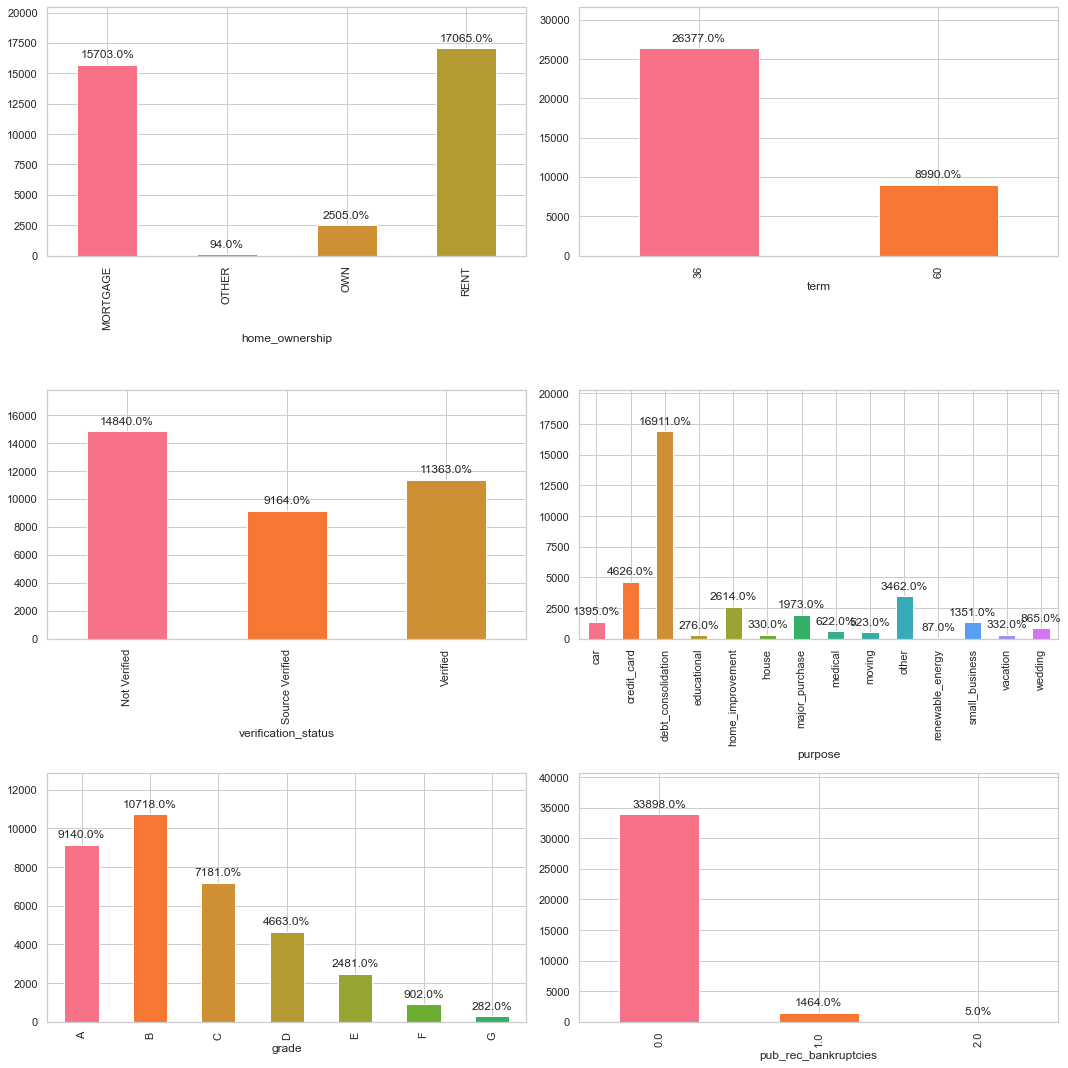

In [100]:
plt.figure(figsize=(15,15))

arr = ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies']

rows = int(len(arr)/2)
for idx, val in enumerate(arr, start=1):
    plt.subplot(rows, 2, idx)
    ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
    showLabels(ax)
    plt.tight_layout()

### Obervation
* Most loans are for 36 month term
* Very few loans are extended to people with prior record of bankruptcy
* debt_consolidation is by far the largest 'purpose' for seeking a loan
* Most approved loans are high grade


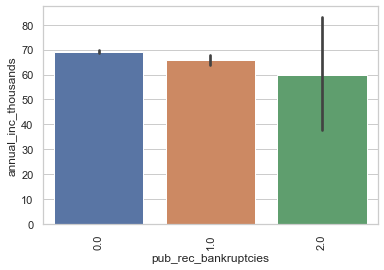

In [101]:
sns.barplot(y='annual_inc_thousands', x='pub_rec_bankruptcies', data=df)
plt.xticks(rotation=90)
plt.show()

### Variable: int_rate
#### Data_Dictionary: Interest Rate on the loan.

In [102]:
df.int_rate.describe()

count   35,367.00
mean        11.98
std          3.70
min          5.42
25%          8.94
50%         11.83
75%         14.46
max         24.40
Name: int_rate, dtype: float64

/Users/chhaya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x360 with 0 Axes>

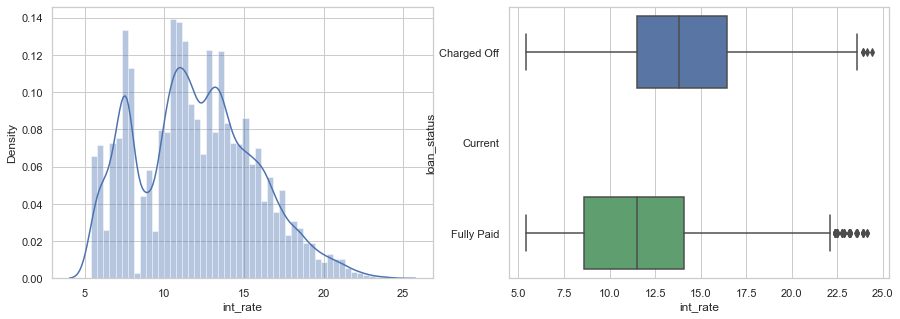

In [103]:
plt.figure(figsize=(15,5))
plot_distribution(df, 'int_rate')

In [104]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"4,943.00",13.93,3.65,5.42,11.49,13.79,16.45,24.40
Current,0.00,nan,nan,nan,nan,nan,nan,nan
Fully Paid,"30,424.00",11.67,3.61,5.42,8.59,11.49,14.09,24.11


### Observation:
* Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
* The interest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases. **need more analysis**

In [105]:
df['interest_rate_buckets'] = round(df['int_rate'])

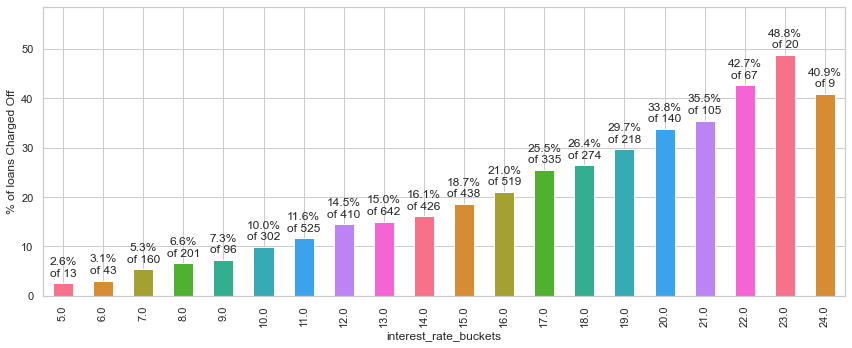

In [106]:
plt.figure(figsize=(12,5))
plotLoanStatus(df, 'interest_rate_buckets')
plt.show()

### Variable: installment
* Data_Dictionary: The monthly payment owed by the borrower if the loan originates.

In [107]:
df.installment.describe()

count   35,367.00
mean       324.04
std        207.15
min         16.08
25%        167.84
50%        280.62
75%        426.64
max      1,305.19
Name: installment, dtype: float64

/Users/chhaya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x360 with 0 Axes>

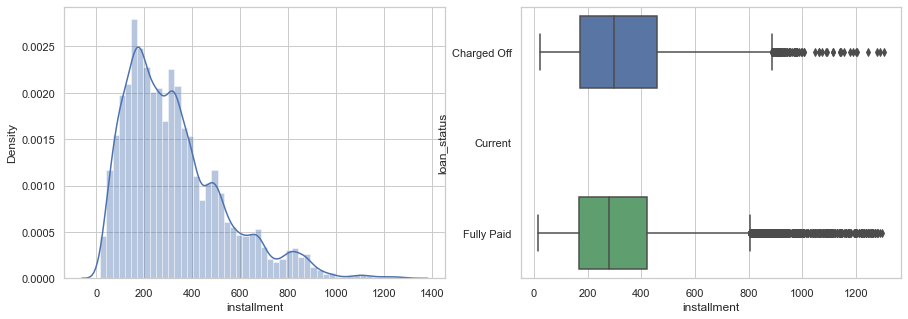

In [108]:
plt.figure(figsize=(15,5))
plot_distribution(df, 'installment')
plt.show()

In [109]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"4,943.00",338.85,214.53,22.79,172.44,298.33,458.31,"1,305.19"
Current,0.00,nan,nan,nan,nan,nan,nan,nan
Fully Paid,"30,424.00",321.64,205.83,16.08,167.30,278.24,422.31,"1,295.21"


### Observation:
* installment amount varies largely between 170.08 to 420 with median of 280
* loans Charged Off have high installment on average

### Variable: grade and sub_grade
* Data_Dictionary: LC assigned loan grade and subgrade.

In [110]:
df.grade.value_counts()

B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: grade, dtype: int64

In [111]:
df.sub_grade.value_counts(normalize=True).head()

A4   0.08
B3   0.07
A5   0.07
B5   0.07
B4   0.06
Name: sub_grade, dtype: float64

/Users/chhaya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


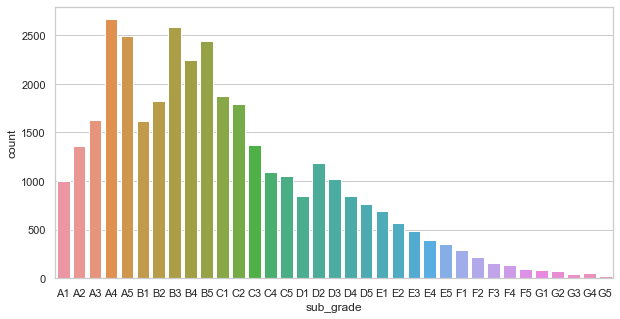

In [112]:
plt.figure(figsize=(10,5))
sns.countplot(df['sub_grade'], order=sorted(df.sub_grade.unique()))
plt.show()

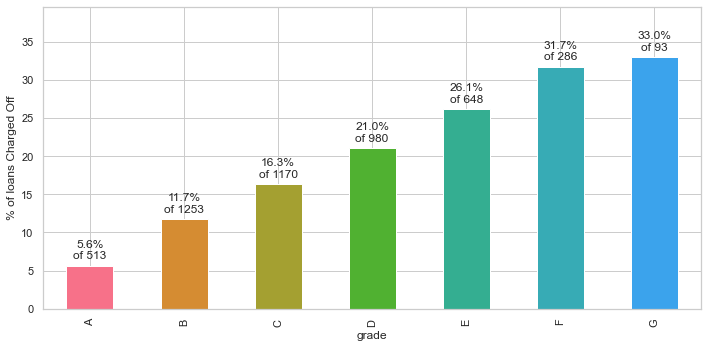

In [113]:
plt.figure(figsize=(10,5))
plotLoanStatus(df, 'grade')
plt.show()

# Observation:
* Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.
* Grade D, E, F, G loans are less safe.
* Lending Clubs grading system is working well.
* Nearly 30% of all loans in Grades F and G see a default.
* Grade E onwards are risky, and less numerous.

### Variable - emp_length
#### Data_Dictionary: Employment length in years. Possible values are between 1 and 11 where 1 means less than one year and 11 means ten or more years.


In [114]:
df.emp_length.value_counts(normalize=True)

11   0.23
1    0.20
2    0.12
3    0.11
4    0.09
5    0.09
6    0.06
7    0.05
8    0.04
9    0.03
Name: emp_length, dtype: float64

/Users/chhaya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


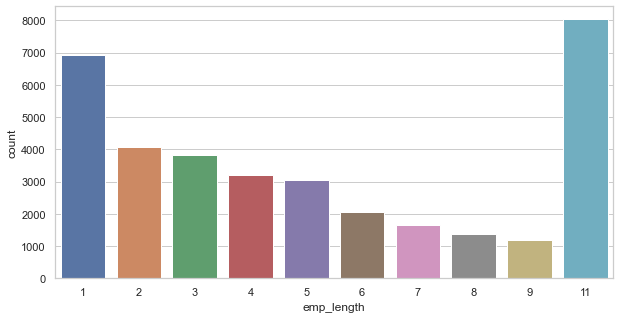

In [115]:
plt.figure(figsize=(10,5))
sns.countplot(df['emp_length'], order=sorted(df.emp_length.unique()))
plt.show()

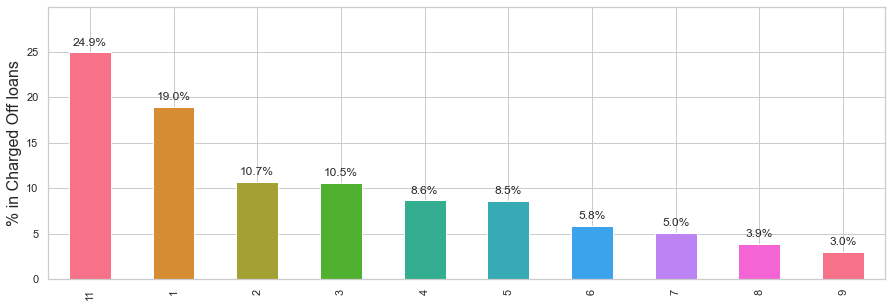

In [116]:
plt.figure(figsize=(15, 5))
plot_percentages(df, 'emp_length')

## Observation:
* major count of defaulters lies when the employee length is 10+ years and when it is 1 or 2 years (early years of employment is risky)

#### Variable: purpose
* Data_Dictionary: A category provided by the borrower for the loan request.

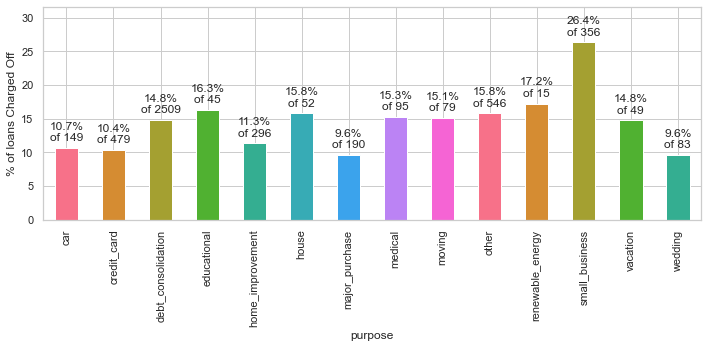

In [125]:
plt.figure(figsize=(10, 5))
plotLoanStatus(df, 'purpose')
plt.show()

### Observation:
* 26% of the laons for small business and 17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance.


#### Variable - home_ownership
* Data_Dictionary: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.


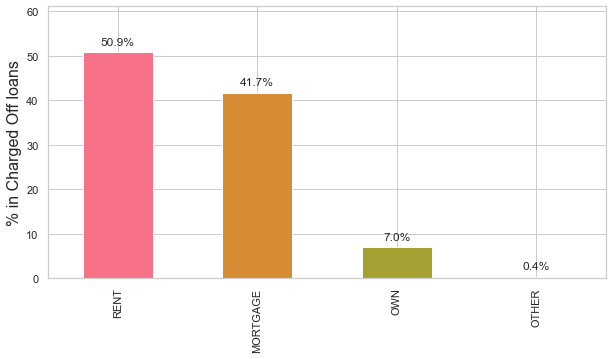

In [117]:
plt.figure(figsize=(10,5))
plot_percentages(df, 'home_ownership')

### Observation:
* Applicants having their home on RENT or on MORTGAGE have almost equal tendency to default the loan

#### Variable - dti
* Data_Dictionary: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [118]:
df.dti.describe()

count   35,367.00
mean        13.40
std          6.64
min          0.00
25%          8.32
50%         13.50
75%         18.64
max         29.99
Name: dti, dtype: float64

/Users/chhaya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x360 with 0 Axes>

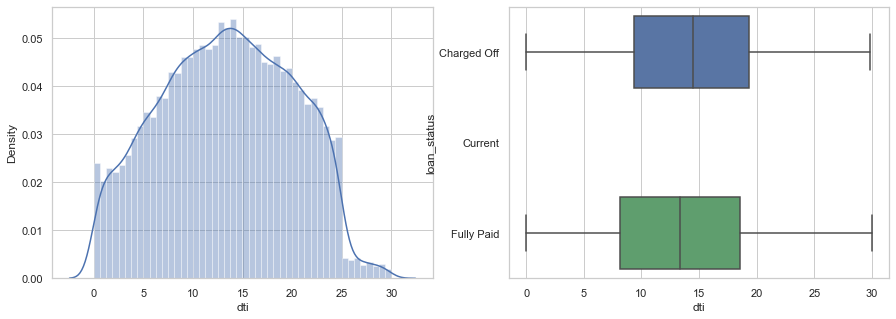

In [120]:
#The dti index varies from min 0 to max of 29.99. The median dti is of 13.40
plt.figure(figsize=(10,5))
plot_distribution(df, 'dti')
plt.show()

In [122]:
# Create derived variable 
df['dti_bin'] = pd.cut(df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

<AxesSubplot:xlabel='dti_bin', ylabel='% of loans Charged Off'>

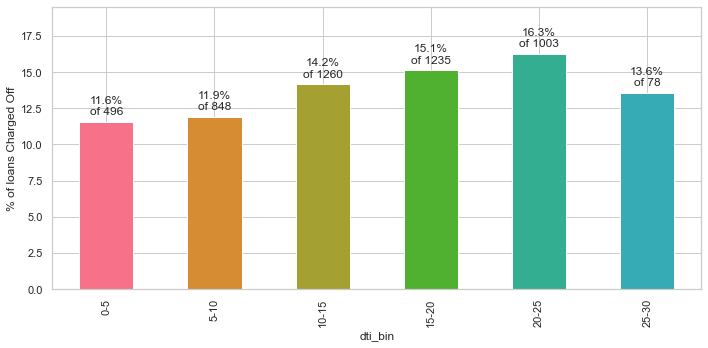

In [123]:
#lets see the plot in respect with loan status
plt.figure(figsize=(10,5))
plotLoanStatus(df, 'dti_bin')

### Observation:
* When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off
* Higher the dti higher the chances of loan being Charged Off